In [ ]:

#what information can help us answer the question : parameters : "Volume_Produced:" ; "Total_Sales:" ; "Quality_Score:"

# Are newcommers welcomed in the beer market?
#### What information can help us answer the question : are newcommers welcomed in the beer market?
1. The number of breweries that have been established in the last 5 years +list of these breweries
2. The number of customer reviews for each of these breweries, which indicates the popularity of the brewery.
3. Average rating of the beers from these breweries, which indicates the quality of the beer.
4. A graph showing the number of total reviews with time to see if the number of reviews is increasing or decreasing.


Additional question : a) does price correlate with quality and rating?
 

 Ideas : 1. number of reviews with time
            #2. average grade evolution with time 


# 0. Info about Datasets

### 0.1. beers.csv
Contains information about the beers, such as the name, style, and brewery.

### 0.2. breweries.csv
Contains information about the breweries, such as the name and location.

### 0.3. reviews.csv
Contains information about the reviews, such as the beer ID, user ID, and rating.

### 0.4. ratings.csv
Contains information about the ratings, such as the beer ID, user ID, and rating.

### 0.5. users.csv
Contains information about the users, such as the username and age.

---

# Summary of Ratings

## Dataset: BeerAdvocate

- **ba_abv**: 4.8 - Percentage alcohol
- **ba_avg**: 3.45 - Average rating (out of 5) of the beer
- **ba_avg_computed**: 3.439867 - Computed average rating (out of 5) of the beer
- **ba_avg_matched_valid_ratings**: 3.504068
- **ba_ba_score**: 80.0 - BA Score is the beer's overall score (out of 100) based on its ranking within its style category, based on a custom Bayesian algorithm
- **ba_beer_id**: 19827 - Unique ID for the beer
- **ba_beer_name**: Legbiter - Name of the beer
- **ba_beer_wout_brewery_name**: Legbiter - Name of the beer without the brewery name
- **ba_brewery_id**: 10093 - Unique ID for the brewery
- **ba_brewery_name**: Strangford Lough Brewing Company Ltd - Name of the brewery
- **ba_bros_score**: 80.0 - The Bros Score is the average score given by the two brothers who founded BeerAdvocate
- **ba_nbr_matched_valid_ratings**: 59
- **ba_nbr_ratings**: 75 - The number of ratings for the beer
- **ba_nbr_reviews**: 59 - The number of reviews for the beer
- **ba_style**: English Pale Ale - The style of the beer
- **ba_zscore**: -0.649167 - Indicates how many standard deviations a data point is from the mean of the dataset.

## Dataset: RateBeer

- **rb_abv**: 4.8 - Percentage alcohol
- **rb_avg**: 2.79
- **rb_avg_computed**: 2.923596
- **rb_avg_matched_valid_ratings**: 2.923596
- **rb_beer_id**: 37923 - Unique ID for the beer
- **rb_beer_name**: Strangford Lough Legbiter - Name of the beer
- **rb_beer_wout_brewery_name**: Legbiter - Name of the beer without the brewery name
- **rb_brewery_id**: 4959 - Unique ID for the brewery
- **rb_brewery_name**: Strangford Lough - Name of the brewery
- **rb_nbr_matched_valid_ratings**: 89
- **rb_nbr_ratings**: 89 - The number of reviews for the beer
- **rb_overall_score**: 23.0 - The overall rating (out of 100)
- **rb_style**: Golden Ale/Blond Ale - The style of the beer
- **rb_style_score**: 27.0 - The rating in this style category (out of 100)
- **rb_zscore**: -0.698304 - Indicates how many standard deviations a data point is from the mean of the dataset.

## Dataset: Matched Beer Data

- **scores_diff**: 1.0
- **scores_sim**: 1.0

## Part I : Dataset initialization and loading into a pandas DataFrame 

In [ ]:
#libraries :
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Define the list of filenames to be extracted
filenames = ["matched_beer_data.tar.gz", "BeerAdvocate.tar.gz", "RateBeer.tar.gz"]
base_directory = "src/data"

# Loop through each filename in the list
for fname in filenames:
    # Create the extraction folder named data_{base_name}
    base_name = os.path.splitext(os.path.splitext(fname)[0])[0]  # Remove both .tar and .gz
    extract_folder = os.path.join(base_directory, f"data_{base_name}")
    
    # Create the folder if it does not exist
    os.makedirs(extract_folder, exist_ok=True)
    
    # Check the file extension and open the tar file accordingly
    if fname.endswith("tar.gz"):
        with tarfile.open(fname, "r:gz") as tar:
            tar.extractall(path=extract_folder)  
            print(f"Extracted all contents from {fname} to {extract_folder}")
    elif fname.endswith("tar"):
        with tarfile.open(fname, "r:") as tar:
            tar.extractall(path=extract_folder)
            print(f"Extracted all contents from {fname} to {extract_folder}")
    else:
        print(f"The file {fname} is not a recognized .tar.gz or .tar file.")



#3_ open data in pandas dataframe : 
    #3.1
ba_beers = pd.read_csv("src/data/data_BeerAdvocate/beers.csv")
ba_breweries = pd.read_csv("src/data/data_BeerAdvocate/breweries.csv")
ba_users = pd.read_csv("src/data/data_BeerAdvocate/users.csv")

    #3.2
rb_beers = pd.read_csv("src/data/data_RateBeer/beers.csv")
rb_breweries = pd.read_csv("src/data/data_RateBeer/breweries.csv")
rb_users = pd.read_csv("src/data/data_RateBeer/users.csv")

    #3.3 : we will mostly use this files, since they have fusionned the data from the ratebeer and beeradvocate datasets
matched_beers = pd.read_csv("src/data/data_matched_beer_data/beers.csv", header=[0, 1])
matched_breweries = pd.read_csv("src/data/data_matched_beer_data/breweries.csv", header=[0, 1])
matched_ratings = pd.read_csv("src/data/data_matched_beer_data/ratings.csv", header=[0, 1])
matched_users_approx = pd.read_csv("src/data/data_matched_beer_data/users_approx.csv", header=[0, 1])
matched_users = pd.read_csv("src/data/data_matched_beer_data/users.csv", header=[0, 1])
    #3.3.1 : flatten the columns for easier access
matched_beers.columns = ['_'.join(col).strip() for col in matched_beers.columns.values]
matched_breweries.columns = ['_'.join(col).strip() for col in matched_breweries.columns.values]
matched_ratings.columns = ['_'.join(col).strip() for col in matched_ratings.columns.values]
matched_users_approx.columns = ['_'.join(map(str, col)).strip() for col in matched_users_approx.columns.values]
matched_users.columns = ['_'.join(col).strip() for col in matched_users.columns.values]

Extracted all contents from matched_beer_data.tar.gz to src/data\data_matched_beer_data
Extracted all contents from BeerAdvocate.tar.gz to src/data\data_BeerAdvocate
Extracted all contents from RateBeer.tar.gz to src/data\data_RateBeer


# Part 2: Data exploration : Most reviewed beer

In [ ]:
#Data exploration : 

    #1. Most reviewed beer.
    
    #3. Most reviewers per country (in percentage)

#1. Most reviewed beers and average grade : 
matched_beers['rb_and_ba_total_nbr_ratings'] = matched_beers['rb_nbr_ratings'] + matched_beers['ba_nbr_ratings']
matched_beers['rb_and_ba_total_ratings'] = (matched_beers['rb_avg_computed']*matched_beers['rb_nbr_ratings'] + matched_beers['ba_avg_computed']*matched_beers['ba_nbr_ratings'])/matched_beers['rb_and_ba_total_nbr_ratings']


# Merge to add 'country' column to matched_beers
matched_beers = pd.merge(
    matched_beers,matched_breweries[['rb_id', 'rb_location']],
    left_on=['rb_brewery_id'],   # Columns in matched_beers
    right_on=['rb_id'],  # Columns in matched_breweries
    how="left"
)

top_beers = matched_beers.sort_values(
        by=['rb_and_ba_total_nbr_ratings'],ascending=False
    ).head(5)

# Print all
i = 1
for _, row in top_beers[['ba_beer_name', 'ba_brewery_name', 'ba_style', 'rb_and_ba_total_nbr_ratings', 'rb_and_ba_total_ratings', 'rb_location']].iterrows():
    print(f"TOP {i} : The beer '\033[1m{row['ba_beer_name']}\033[0m', brewed by '\033[1m{row['ba_brewery_name']}\033[0m' from, \033[1m{row['rb_location']}\033[0m "
          f" is of style '\033[1m{row['ba_style']}\033[0m' and has been reviewed by '\033[1m{row['rb_and_ba_total_nbr_ratings']}\033[0m' persons with an average grade of '\033[1m{row['rb_and_ba_total_ratings']:.2f}\033[0m' .")
    i+=1

    

TOP 1 : The beer 'Trappistes Rochefort 10', brewed by 'Brasserie de Rochefort' from, Belgium  is of style 'Quadrupel (Quad)' and has been reviewed by '14500' persons with an average grade of '4.44' .
TOP 2 : The beer 'Brooklyn Black Chocolate Stout', brewed by 'Brooklyn Brewery' from, United States, New York  is of style 'Russian Imperial Stout' and has been reviewed by '10078' persons with an average grade of '4.10' .
TOP 3 : The beer 'AleSmith Speedway Stout', brewed by 'AleSmith Brewing Company' from, United States, California  is of style 'American Double / Imperial Stout' and has been reviewed by '9806' persons with an average grade of '4.36' .
TOP 4 : The beer 'Delirium Tremens', brewed by 'Brouwerij Huyghe' from, Belgium  is of style 'Belgian Strong Pale Ale' and has been reviewed by '9103' persons with an average grade of '3.95' .
TOP 5 : The beer 'Blind Pig IPA', brewed by 'Russian River Brewing Company' from, United States, California  is of style 'American IPA' and has been 

# Part 3 : Most reviewed brewery.

In [3]:
#Step 2 : Most reviewed breweries and average grade :

# Step 1: Calculate the weighted grades for each beer
matched_beers['ba_prod_grade_nbr'] = matched_beers['ba_avg_computed'] * matched_beers['ba_nbr_ratings']
matched_beers['rb_prod_grade_nbr'] = matched_beers['rb_avg_computed'] * matched_beers['rb_nbr_ratings']

# Step 2: Group by brewery to get total weighted grades and ratings counts
recap_breweries_info = (
    matched_beers
    .groupby('ba_brewery_id')[['ba_prod_grade_nbr', 'rb_prod_grade_nbr', 'ba_nbr_ratings', 'rb_nbr_ratings']]
    .sum()
    .reset_index()
)

# Step 3: Calculate the average grade for each brewery
recap_breweries_info['avg_grade'] = (
    (recap_breweries_info['ba_prod_grade_nbr'] + recap_breweries_info['rb_prod_grade_nbr']) / 
    (recap_breweries_info['ba_nbr_ratings'] + recap_breweries_info['rb_nbr_ratings'])
)

# Step 4: Calculate total ratings count per brewery
recap_breweries_info['total_nbr_ratings'] = recap_breweries_info['ba_nbr_ratings'] + recap_breweries_info['rb_nbr_ratings']

# Step 5: Select only the final columns and sort by total ratings
recap_breweries_info = (
    recap_breweries_info[['ba_brewery_id', 'avg_grade', 'total_nbr_ratings']]
    .sort_values(by='total_nbr_ratings', ascending=False)
)

# Step 6: Merge with brewery information to add name and location
recap_breweries_info = pd.merge(
    recap_breweries_info,
    matched_breweries[['ba_id', 'ba_name', 'ba_location']],
    left_on='ba_brewery_id',  
    right_on='ba_id',           
    how="left"
).drop(columns=['ba_id'])  # Drop the 'ba_id' column

# Print each brewery's information
i = 1
for _, row in recap_breweries_info[['ba_brewery_id', 'ba_name', 'ba_location', 'total_nbr_ratings', 'avg_grade']].iterrows():
    print(f"TOP {i}: The brewery '\033[1m{row['ba_name']}\033[0m' from '\033[1m{row['ba_location']}\033[0m' "
          f"has been reviewed by '\033[1m{row['total_nbr_ratings']}\033[0m' persons with an average grade of '\033[1m{row['avg_grade']:.2f}\033[0m'.")
    i += 1
    if i > 5: break

TOP 1: The brewery 'Brooklyn Brewery' from 'United States, New York' has been reviewed by '37242' persons with an average grade of '3.78'.
TOP 2: The brewery 'Russian River Brewing Company' from 'United States, California' has been reviewed by '31653' persons with an average grade of '4.18'.
TOP 3: The brewery 'Maine Beer Company' from 'United States, Maine' has been reviewed by '25561' persons with an average grade of '4.21'.
TOP 4: The brewery 'Weyerbacher Brewing Co.' from 'United States, Pennsylvania' has been reviewed by '24831' persons with an average grade of '3.66'.
TOP 5: The brewery 'Brouwerij Huyghe' from 'Belgium' has been reviewed by '22184' persons with an average grade of '3.73'.


# Part 3: Analysis of Customer Identity and origin

In this section, we will analyze the identity of the customers by examining the number of reviewers per country in percentage and their average grade. This will help us understand the distribution and behavior of beer reviewers across different regions.

In [42]:
#3. Now we deep into the identity of the customers, first by analyzing the number of reviewers per country in percentage and then by analyzing their average grade
# Step 1: Count the number of users per country from both ba_users and rb_users
users_per_country = ba_users['location'].value_counts().reset_index()
users_per_country.columns = ['country', 'num_users_ba']

users_per_country2 = rb_users['location'].value_counts().reset_index()
users_per_country2.columns = ['country', 'num_users_rb']

# Combine the user counts from both datasets
total_users_per_country = pd.merge(users_per_country, users_per_country2, on='country', how='outer').fillna(0)
total_users_per_country['num_users'] = total_users_per_country['num_users_ba'] + total_users_per_country['num_users_rb']

# Step 2: Calculate the average number of ratings per country from both ba_users and rb_users
avg_ratings_ba = ba_users.groupby('location')['nbr_ratings'].mean().reset_index()
avg_ratings_ba.columns = ['country', 'avg_nbr_ratings_ba']

avg_ratings_rb = rb_users.groupby('location')['nbr_ratings'].mean().reset_index()
avg_ratings_rb.columns = ['country', 'avg_nbr_ratings_rb']

# Step 3: Merge the average ratings from both datasets and calculate the combined average
avg_ratings_per_country = pd.merge(avg_ratings_ba, avg_ratings_rb, on='country', how='outer').fillna(0)

# Calculate the weighted average number of ratings
avg_ratings_per_country = pd.merge(avg_ratings_per_country, total_users_per_country[['country', 'num_users_ba', 'num_users_rb']], on='country', how='left')
avg_ratings_per_country['avg_nbr_ratings'] = (
    (avg_ratings_per_country['avg_nbr_ratings_ba'] * avg_ratings_per_country['num_users_ba']) + 
    (avg_ratings_per_country['avg_nbr_ratings_rb'] * avg_ratings_per_country['num_users_rb'])
) / (avg_ratings_per_country['num_users_ba'] + avg_ratings_per_country['num_users_rb'])

# Step 4: Create the final country analysis table
country_analysis = pd.merge(
    total_users_per_country[['country', 'num_users']],
    avg_ratings_per_country[['country', 'avg_nbr_ratings']],
    on='country', 
    how='left'
)

# Sort the results by the total number of users
country_analysis = country_analysis.sort_values(by='num_users', ascending=False)

# Display the result
print(country_analysis)


                          country  num_users  avg_nbr_ratings
192     United States, California    14442.0        68.674491
225   United States, Pennsylvania    10321.0        86.017053
219       United States, New York     8784.0        73.034950
200       United States, Illinois     8272.0        89.258341
208  United States, Massachusetts     7332.0        63.912029
..                            ...        ...              ...
184                        Tuvalu        1.0         1.000000
183                  Turkmenistan        1.0        69.000000
68                      Greenland        1.0       374.000000
66                      Gibraltar        1.0         1.000000
168                         Sudan        1.0         3.000000

[250 rows x 3 columns]


In [50]:
# Function to remove all entrie containing "United States" in the 'country' column and replace them with a single entry

# This pattern captures any entry that starts with "United States" as a whole word
us_rows = country_analysis[country_analysis['country'].str.contains(r"\bUnited States\b", case=False, na=False)]

#Calculate product of num_users and avg_nbr_ratings for all "United States" entries
total_product_ratings_time_population = (us_rows['num_users'] * us_rows['avg_nbr_ratings']).sum()

#Sum the total nbr of users (reviews) for all "United States" entries
total_nbr_users = us_rows['num_users'].sum()

# Remove the rows containing "United States"
country_info = country_analysis[~country_analysis['country'].str.contains(r"\bUnited States\b", case=False, na=False)]

# Creates a new single row for the USA entry
new_row = pd.DataFrame({
    'country': ['United States'],
    'num_users': [total_nbr_users],
    'avg_nbr_ratings': [total_product_ratings_time_population / total_nbr_users]  # Calculates average ratings
})

#summaries all the infos in the country_info dataframe
country_info = pd.concat([country_info, new_row], ignore_index=True) 
country_info = country_info.sort_values(by='num_users', ascending=False)

# Display the modified DataFrame
print(country_info)



                                      country  num_users  avg_nbr_ratings
200                             United States   140078.0        75.518561
0                                      Canada     6579.0       124.791762
1                                     England     3525.0       143.918014
2                                   Australia     1996.0        70.682365
3                                      Poland     1765.0       118.710482
..                                        ...        ...              ...
172  South Georgia and South Sandwich Islands        1.0        16.000000
173                           Solomon Islands        1.0         3.000000
174                                  Anguilla        1.0         1.000000
175                          Falkland Islands        1.0         1.000000
171                                     Yemen        1.0         2.000000

[201 rows x 3 columns]


In [73]:
#Now we will normalise by the countries size to have a better view of the data
countries_population = pd.read_csv("src/data/Data_Countries_population/countries_population.csv") #taken from world bank group
countries_population2010 = countries_population[['Country Name', '2010']] #since the data represents the ratings from 2001 to 2017, we will use the 2010 year as a reference.

country_analysis2 = pd.merge(country_info, countries_population2010[['Country Name', '2010']], left_on='country', right_on='Country Name', how='left')

country_analysis2 = country_analysis2.drop(columns=['Country Name'])
#Now we will will count the number of Nan in the 2010 column, which represents the countries that have a slightly different name in the world bank group dataset
#we will rename them by hand in the world bank group dataset.

# Count the number of NaN values in the '2010' column
num_nan_2010 = country_analysis2['2010'].isnull().sum()
print (num_nan_2010)
# Note: We reduced the NaN values to 48. The remaining "countries" were left because most of them are small regions that had to be attached to bigger ones because of 
# geopolitical reasons and others were small countries/islands with a low user counts (max 10), 
# making their impact on the analysis negligible.
country_analysis2 = country_analysis2.dropna()

#rename the 2010 column to 'population_in_2010'
country_analysis2 = country_analysis2.rename(columns={'2010': 'population_in_2010'})
country_analysis2['percentage_reviewers_per_country'] = (country_analysis2['num_users'] / country_analysis2['population_in_2010']) * 100

48


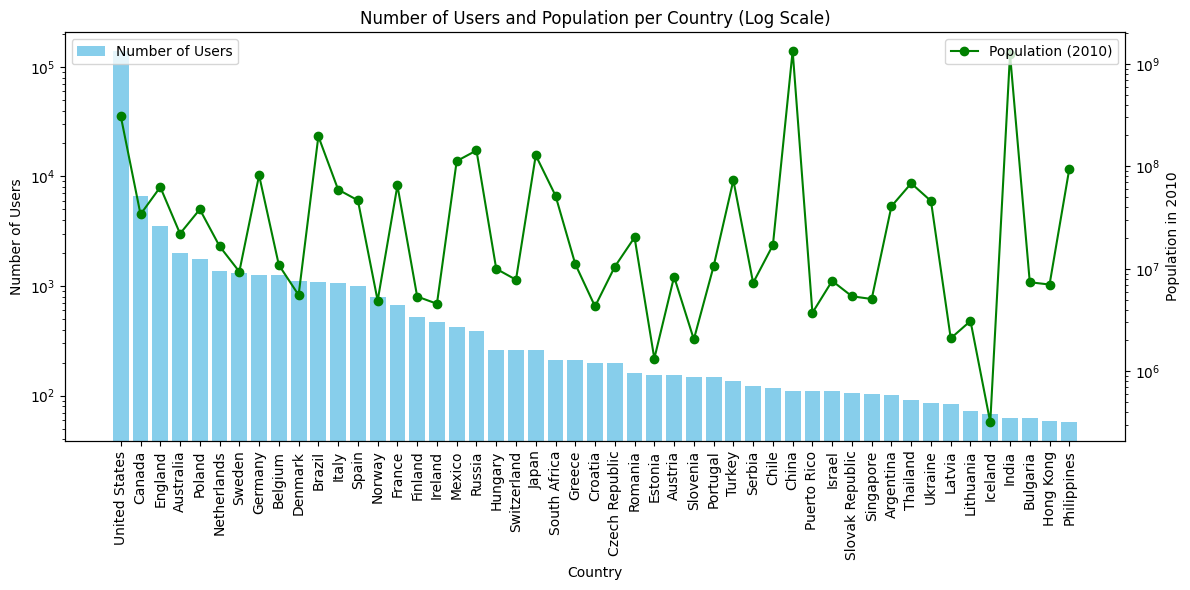

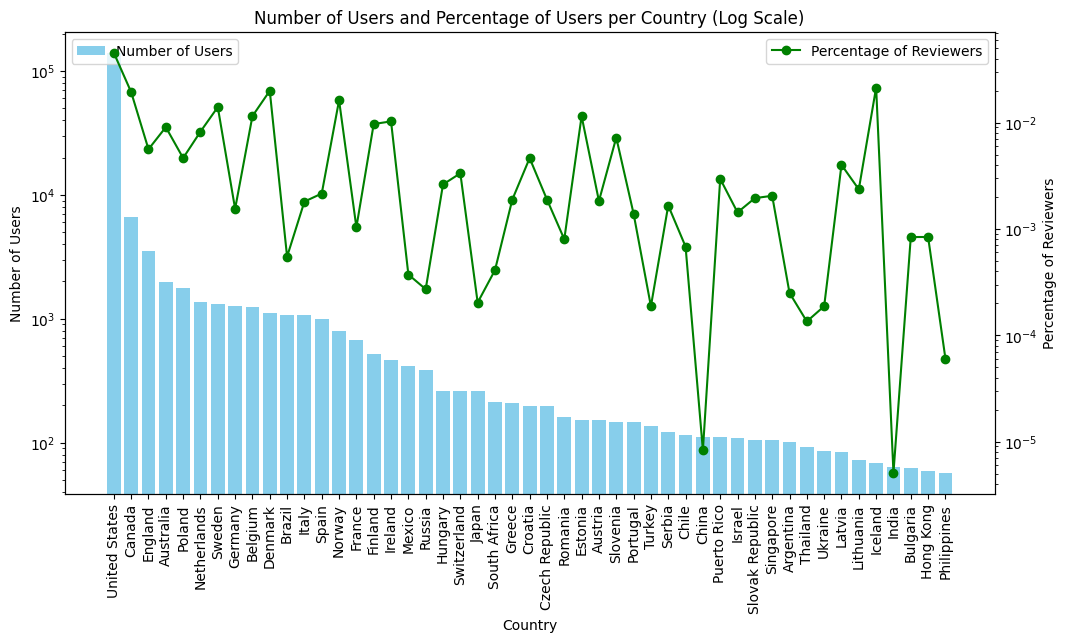

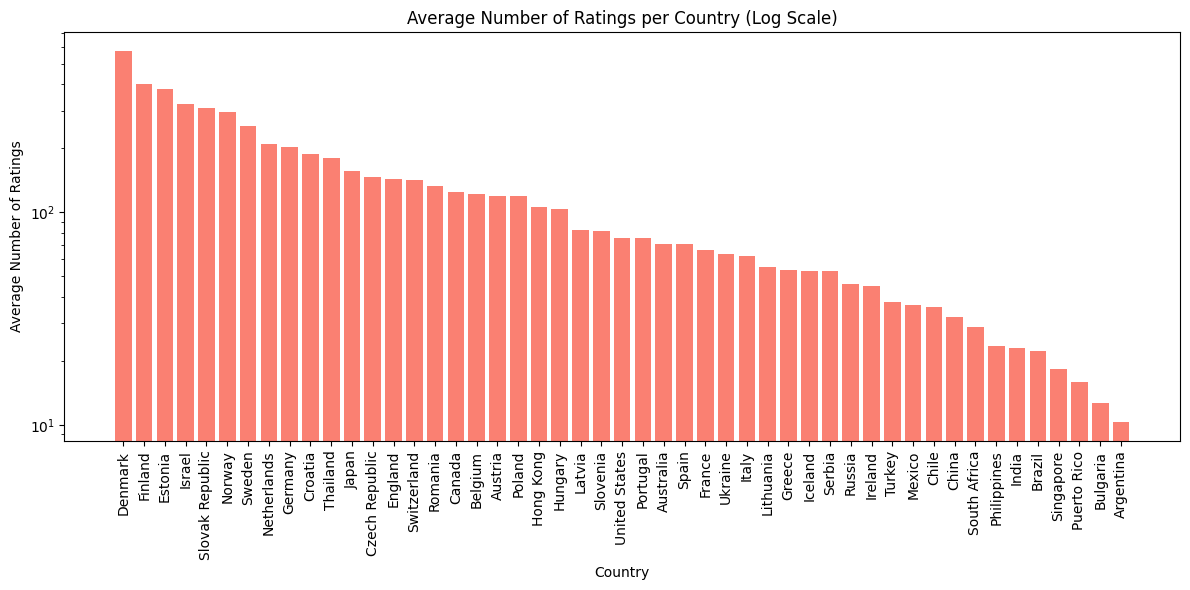

In [82]:
# discard countries with less than 50 users
filtered_data = country_analysis2[country_analysis2['num_users'] >= 50]

# Plot 1: Nbr of Users and population per Country (Log Scale)
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Number of Users
ax1.bar(filtered_data['country'], filtered_data['num_users'], color='skyblue', label='Number of Users')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Users')
ax1.set_yscale('log')  
ax1.set_title('Number of Users and Population per Country (Log Scale)')
ax1.tick_params(axis='x', rotation=90)
# Plot also the total Population of the country
ax2 = ax1.twinx()
ax2.plot(filtered_data['country'], filtered_data['population_in_2010'], color='green', marker='o', linestyle='-', label='Population (2010)')
ax2.set_ylabel('Population in 2010')
ax2.set_yscale('log') 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.show()


#Plot 2: Percentage of Reviewers per Country (Log Scale)
ig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(filtered_data['country'], filtered_data['num_users'], color='skyblue', label='Number of Users')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Users')
ax1.set_yscale('log')  
ax1.set_title('Number of Users and Percentage of Users per Country (Log Scale)')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(filtered_data['country'], filtered_data['percentage_reviewers_per_country'], color='green', marker='o', linestyle='-', label='Percentage of Reviewers')
ax2.set_ylabel('Percentage of Reviewers')
ax2.set_yscale('log') 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.show()

# Plot 3: Average Number of Ratings per Country (Log Scale)
filtered_data2 = filtered_data.sort_values(by='avg_nbr_ratings', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(filtered_data2['country'], filtered_data2['avg_nbr_ratings'], color='salmon')
plt.xlabel('Country')
plt.ylabel('Average Number of Ratings')
plt.title('Average Number of Ratings per Country (Log Scale)')
plt.yscale('log')  # Set y-axis to log scale
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



### Part 3.1 : We can also examine the number of breweries in each country in relation to the number of customers from that country.

In [ ]:
#Furthermore, as we are a small startup, we would like to know the average number of reviews for each brewery, to understand the competition in the market.
#and if it's possible the easily become known in the market.

In [ ]:
#Then we will try to analyse the time evolution of new breweries.

from datetime import datetime

def convert_timestamp_to_date(timestamp):
    """
    Convert a Unix timestamp to a human-readable date format.

    Args:
        timestamp (int): Unix timestamp.

    Returns:
        str: Date in 'YYYY-MM-DD HH:MM:SS' format.
    """
    return datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

# Example usage
example_timestamp = 1322564400
print("Readable date:", convert_timestamp_to_date(example_timestamp))